In [1]:
import pandas as pd
import matplotlib.pyplot as plt,seaborn as sns


In [2]:
df = pd.read_csv('heart_v2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [3]:
df.head()

age  sex   BP  cholestrol  heart disease
0   70    1  130         322              1
1   67    0  115         564              0
2   57    1  124         261              1
3   64    1  128         263              0
4   74    0  120         269              0

In [4]:
df['heart disease'].value_counts()

0    150
1    120
Name: heart disease, dtype: int64

In [5]:
X = df.drop('heart disease', axis=1)
y= df['heart disease']

Train-test split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

### Building a decision tree

Use all default parameters except depth

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dt = DecisionTreeClassifier(max_depth=3)
# keeping depth as 3 so that we don't get a bigger tree
dt

DecisionTreeClassifier(max_depth=3)

In [10]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [11]:
%pip install pydotplus

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.


In [12]:
%pip install graphviz

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.


In [13]:
from IPython.display import Image
# for any given structure, it draws an image
from six import StringIO 
# to import o/p  graph into a file
from sklearn.tree import export_graphviz
# graphviz is an object which will be used to plot graph
import pydotplus,graphviz


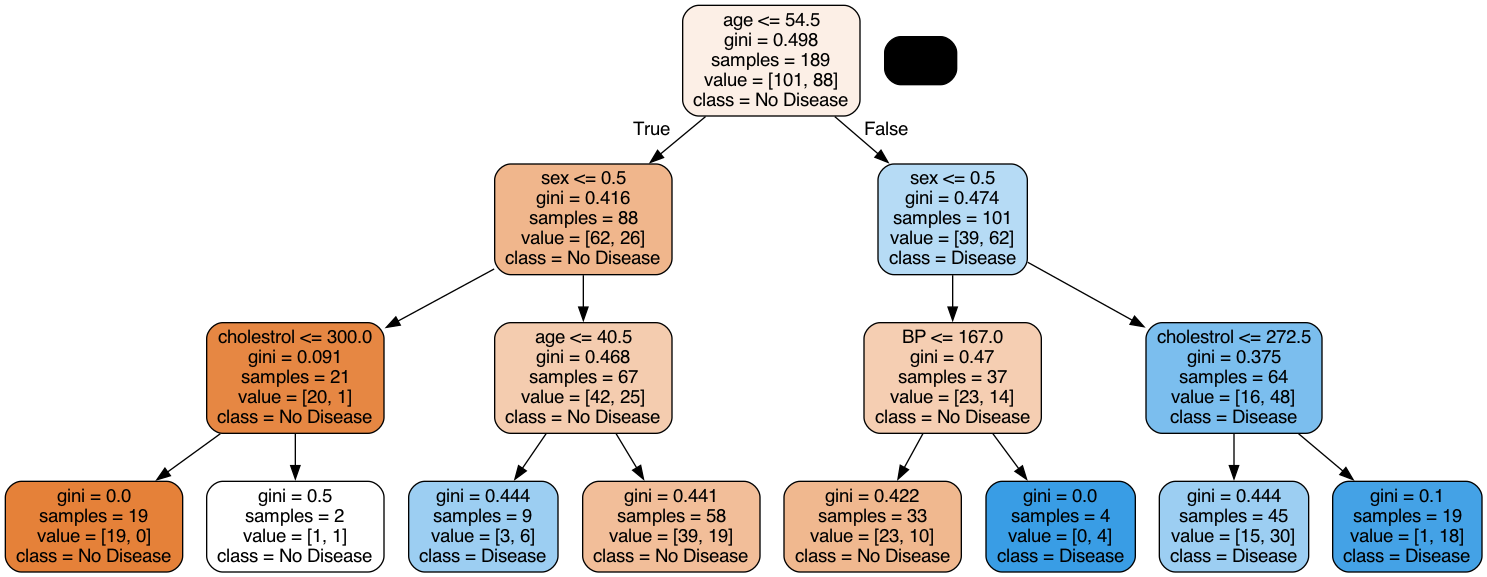

In [14]:
dot_data = StringIO()
# There are two steps here - 1) first we take the graph and put it on dot_data file
# 2) Then you import the .data and make it into an image

export_graphviz(dt, out_file=dot_data, filled= True,rounded=True,
               feature_names = X.columns,
               class_names = ['No Disease', 'Disease']) # we are creating graphviz object and put it into dot_data
# filled = True is a formatting option,which will fill colours in the tree generated
# rounded = true, this will be used to change the aesthetics, whether they have rounded edges or not

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [15]:
##### Method -2
# Generate the tree in a dot file - i.e heartPrediction.dot
# Copy the content generated - paste it to webgraphiz (http://www.webgraphviz.com/?tab=map)
from sklearn import tree
with open("heartPrediction.dot","w") as f:
    f= tree.export_graphviz(dt.fit(X_train, y_train),
                           feature_names=X.columns,
                           out_file=f)

In [16]:
### Trying with hyperparameter tuning - to see if it actually works!

clf = DecisionTreeClassifier(max_depth=1)
with open("heartPrediction.dot","w") as f:
    f= tree.export_graphviz(clf.fit(X_train, y_train),
                           feature_names=X.columns,
                           out_file=f)
    
## It did WORK!!



In [17]:
clf.feature_importances_
# Age is the important feature so it's set as 1
# These values are calculated based on the reduction of entropy / Information Gain

array([1., 0., 0., 0.])

Evaluating the model performance on test set

In [18]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)


In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [20]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.7407407407407407


array([[82, 19],
       [30, 58]])

In [21]:
print("**test set performance**")
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

**test set performance**
0.6049382716049383


array([[35, 14],
       [18, 14]])

You can see that the model that we have now is not performing well on the test set. This is because we built our model on the default parameters except for the depth and didn’t change any other hyperparameters. Hyperparameter tuning can improve the performance of decision trees to a great extent.

### What are hyperparameters?

- Hyperparameters are simply the parameters that we pass on to the learning algorithm to control the training of the model. Hyperparameters are choices that the algorithm designer makes to ‘tune’ the behaviour of the learning algorithm. The choice of hyperparameters, therefore, has a lot of bearing on the final model produced by the learning algorithm.  

 

- So basically anything that is passed on to the algorithm before it begins its training or learning process is a hyperparameter, i.e., these are the parameters that the user provides and not something that the algorithm learns on its own during the training process. Here, one of the hyperparameters you input was "max_depth" which essentially determines how many levels of nodes will you have from root to leaf. This is something that the algorithm is incapable of determining on its own and has to be provided by the user. Hence, it is a hyperparameter.

 

- Now, obviously, since hyperparameters can take many values, it is essential for us to determine the optimal values where the model will perform the best. This process of optimising hyperparameters is called hyperparameter tuning.

There are certain cases where you cannot directly apply linear regression to solve a regression problem. Linear regression fits only one model to the entire data set; however, you may want to divide the data set into multiple subsets and apply decision tree algorithm in such cases to handle non-linearity.


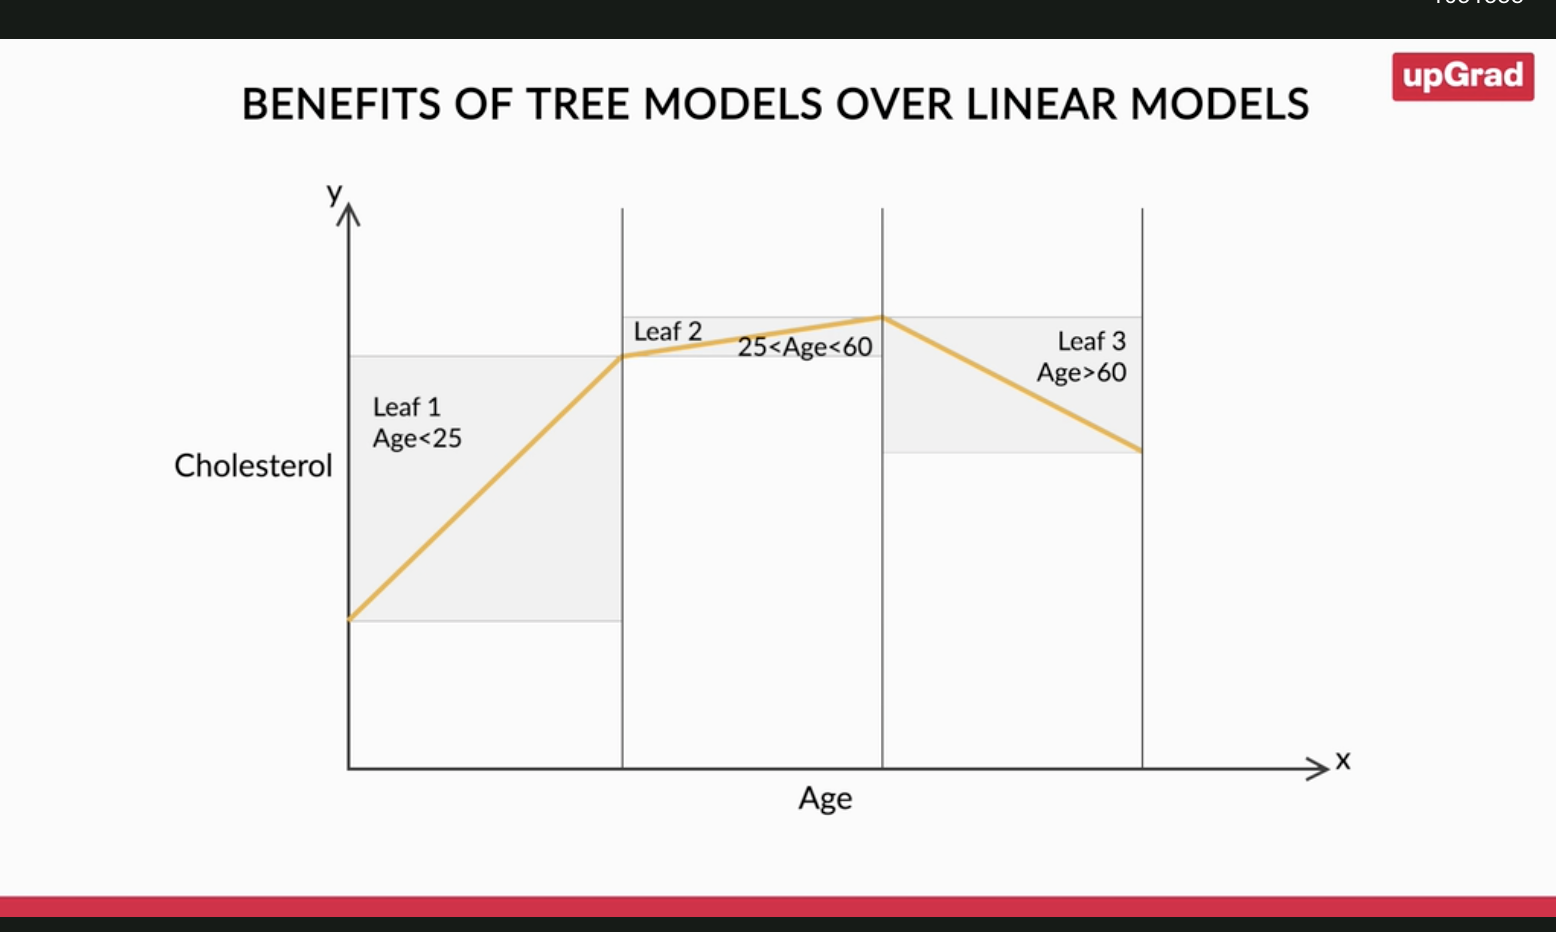



The advantages of tree models one by one in the following order:

- Predictions made by a decision tree are easily interpretable.

- A decision tree is versatile in nature. It does not assume anything specific about the nature of the attributes in a data set. It can seamlessly handle all kinds of data such as numeric, categorical, strings, Boolean, etc.

- A decision tree is scale-invariant. It does not require normalisation, as it only has to compare the values within an attribute, and it handles multicollinearity better.

- Decision trees often give us an idea of the relative importance of the explanatory attributes that are used for prediction.

- They are highly efficient and fast algorithms.

- They can identify complex relationships and work well in certain cases where you cannot fit a single linear relationship between the target and feature variables. This is where regression with decision trees comes into the picture.

In regression problems, a decision tree splits the data into multiple subsets. 
The difference between decision tree classification and decision tree regression is that in regression, each leaf represents the average of all the values as the prediction as opposed to a class label in classification trees. For classification problems, the prediction is assigned to a leaf node using majority voting but for regression, it is done by taking the average value.

In decision trees, you do not have to treat missing values, outliers and multicollinearity before proceeding with model building.
 



Decision trees are easy to interpret, as you can always traverse backwards and identify the various factors that lead to a particular decision. A decision tree requires you to perform certain tests on attributes in order to split the data into multiple partitions.


In classification, each data point in a leaf has a class label associated with it.


You cannot use the linear regression model to make predictions when you need to divide the data set into multiple subsets, as each subset has an independent trend corresponding to it. In such cases, you can use the decision tree model to make predictions because it can split the data into multiple subsets and assign average values as the prediction to each set independently.

### Splitting and Homogeneity


One important thing to remember is that homogeneity here is always referred to response (target) variable's homogeneity.

 

For example, let's suppose we consider the same heart disease example in which you wanted to classify whether a person has a heart disease or not. If one of the nodes is labelled ‘Blood Pressure’, try to split it with a rule such that all the data points that pass the rule have one label and those that do not pass the rule have a different label. Thus, you need to ensure that the response variable's homogeneity in the resultant splits is as high as possible.

 

A split that results in a homogenous subset is much more desirable than the one that results in a 50-50 distribution (in the case of two labels). In a completely homogenous set, all the data points belong to one particular label. Hence, you must try to generate partitions that result in such sets.

 

For classification purposes, a data set is completely homogeneous if it contains only a single class label. For regression purposes, a data set is completely homogeneous if its variance is as small as possible. Till the homogeneity ‘H’ is less than the threshold, you need to continue splitting the node. The process of splitting needs to be continued until homogeneity exceeds the threshold value and the majority data points in the node are of the same class.


A tree can be split based on different rules of an attribute and these attributes can be categorical or continuous in nature. If an attribute is nominal categorical, then there are 
(2^k−1)−1 possible splits for this attribute, where k is the number of classes. In this case, each possible subset of categories is examined to determine the best split.

 

If an attribute is ordinal categorical or continuous in nature with n different values, there are n - 1 different possible splits for it. Each value of the attribute is sorted from the smallest to the largest and candidate splits based on the individual values is examined to determine the best split point which maximizes the homogeneity at a node.

 

There are various other techniques like calculating percentiles and midpoints of the sorted values for handling continuous features in different algorithms and this process is known as discretization.

### Impurity Measures

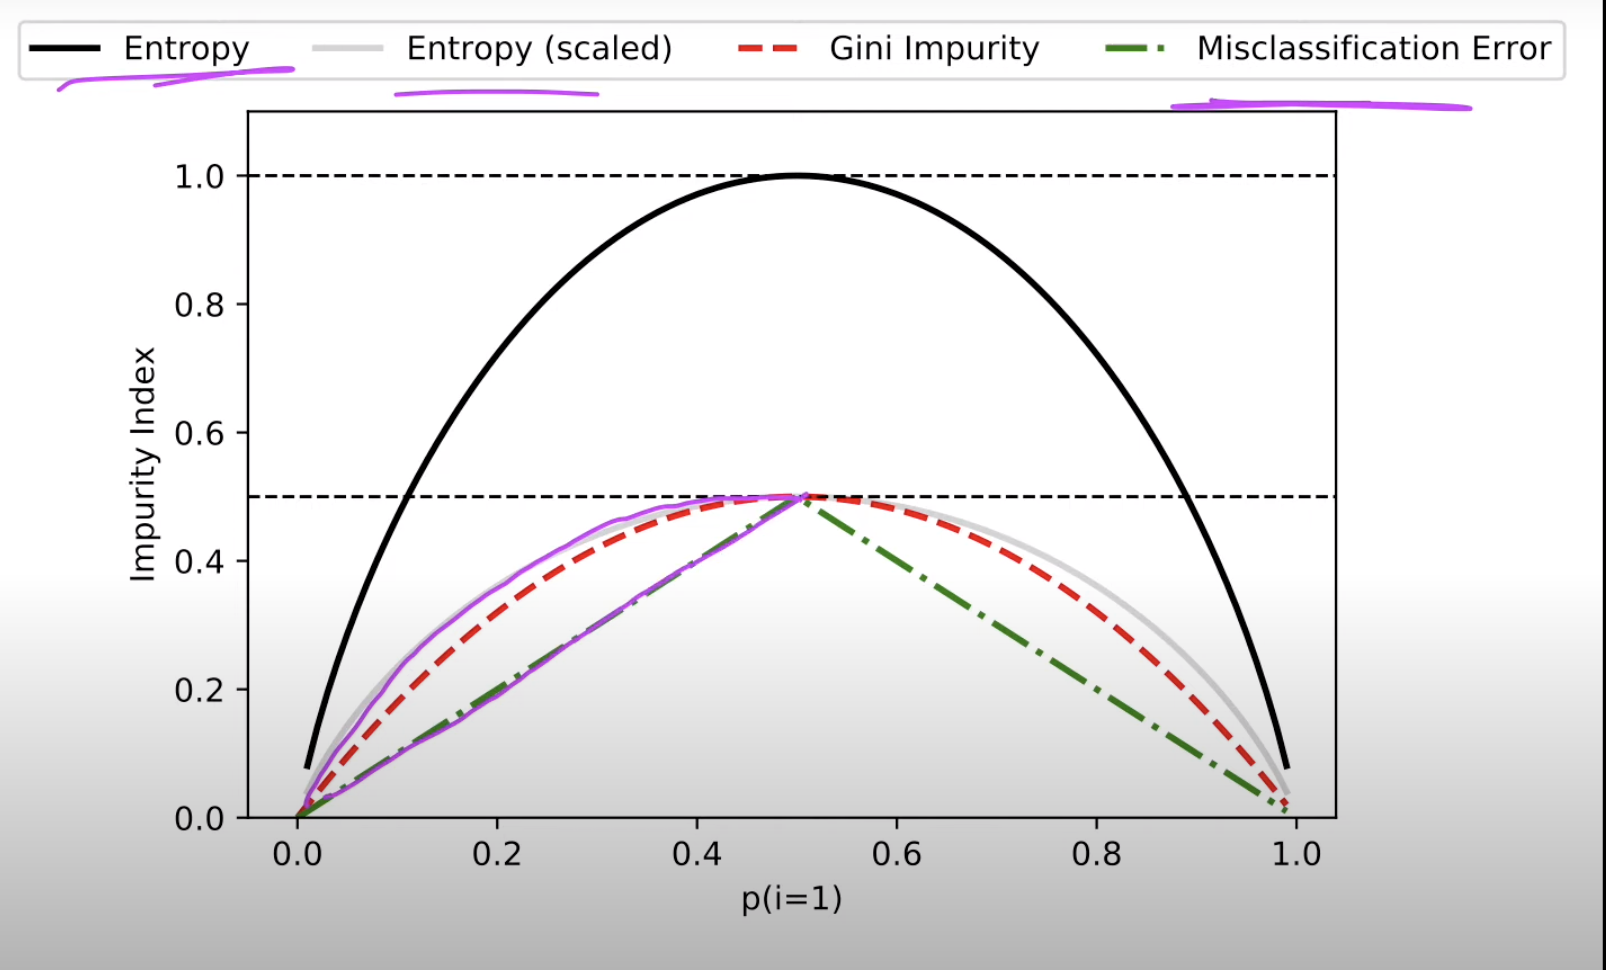


You can see that for a completely non-homogeneous data with equal class distribution, the value of Classification Error and Gini Impurity are the same i.e. 0.5 and that of Entropy is 1.

 

The scaled version of the entropy in the illustration shown in the video is nothing but entropy/2. It has been used to emphasize that the Gini index is an intermediate measure between entropy and the classification error.

In practice, classification error does not perform well. So, we generally prefer using either the Gini index or entropy over it.

###Gini Index

Gini index is the degree of a randomly chosen datapoint being classified incorrectly.

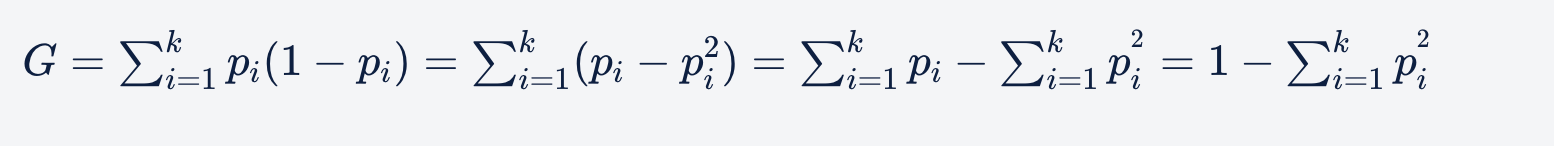

![Gini index](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRzYHkcmZKKp2sJN1HpHvw-NgqbD9EnapnbXozXRgajrSGvEnYy&s)


Here, again **c** is the number of classes and **pi** is the probability associated with the ith class.

Decision trees help in quantifying the importance of each feature by calculating the reduction in the impurity for each feature at a node. The feature that results in a significant reduction in the impurity is the important variable, and the one that results in less impurity reduction is the less important variable.

- A decision tree first decides on an attribute to split on.

- To select this attribute, it measures the homogeneity of the nodes before and after the split.

- You can measure homogeneity in various ways with metrics like Gini index and entropy.

- The attribute that results in the increase of homogeneity the most is then selected for splitting.

- Then, this whole cycle is repeated until you obtain a sufficiently homogeneous data set.

In [22]:
##Create helper function to evaluate the model performance and create teh fgraph for DT

def get_dt_data(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt, out_file=dot_data, filled= True,rounded=True,
               feature_names = X.columns,
               class_names = ['No Disease', 'Disease']) 
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph
    

In [23]:
def evaluate_model(dt_classifier):
    y_train_pred= dt_classifier.predict(X_train)
    y_test_pred= dt_classifier.predict(X_test)
    print("Train Set Performance")
    print(accuracy_score(y_train, y_train_pred))
    print(confusion_matrix(y_train, y_train_pred))
    print("-"*50)
    print("Test Set Performance")
    print(accuracy_score(y_test, y_test_pred))
    print(confusion_matrix(y_test, y_test_pred))
    

In [24]:
evaluate_model(dt)

Train Set Performance
0.7407407407407407
[[82 19]
 [30 58]]
--------------------------------------------------
Test Set Performance
0.6049382716049383
[[35 14]
 [18 14]]


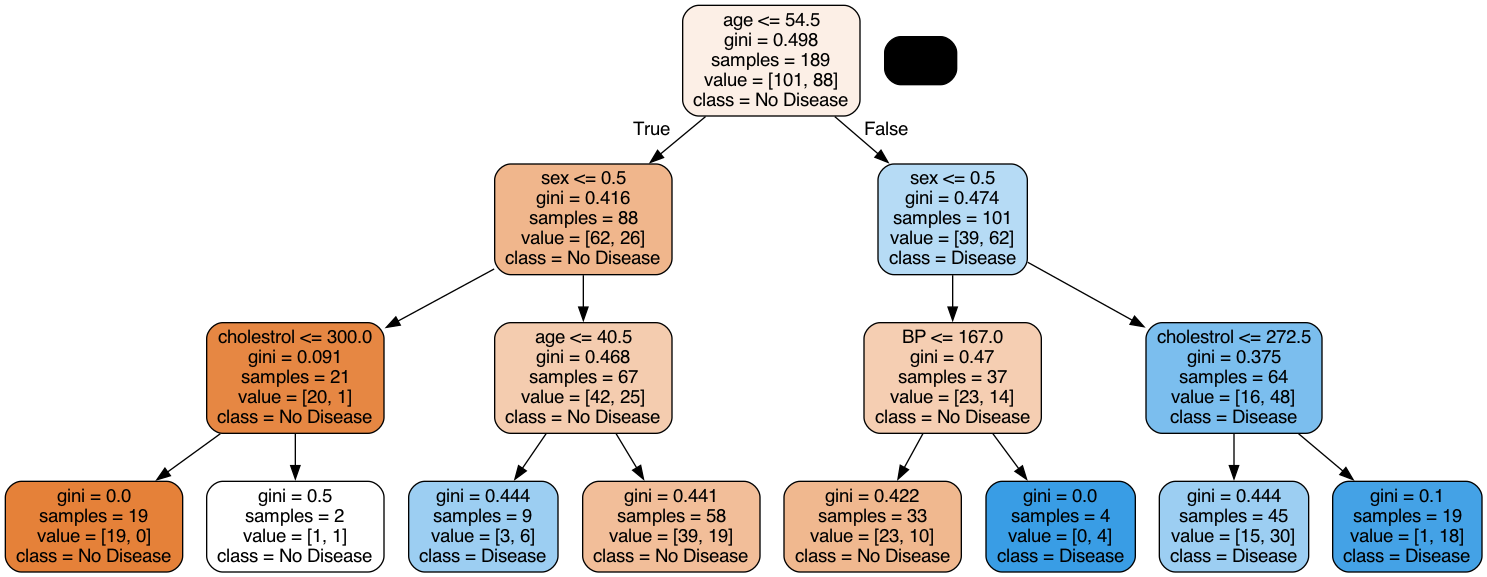

In [25]:
gph = get_dt_data(dt)
Image(gph.create_png())

Decision Tree without any hyper-parameter setting

In [26]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

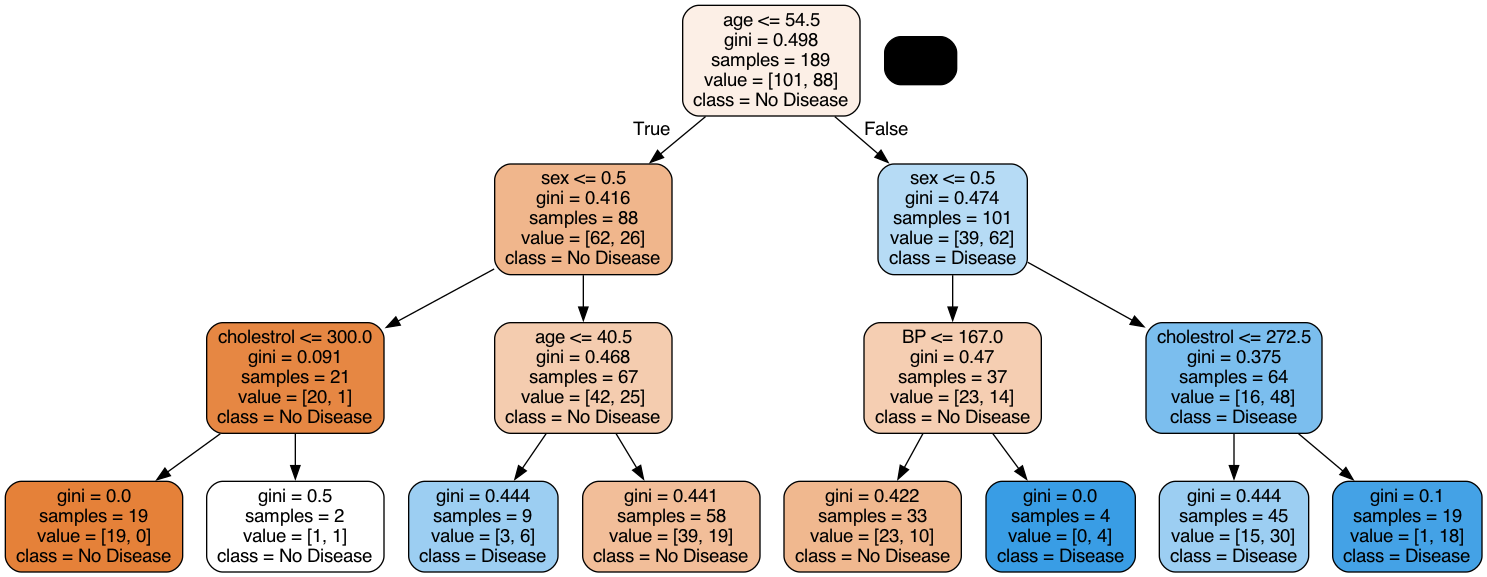

In [27]:
gph = get_dt_data(dt_default)
Image(gph.create_png())

In [28]:
evaluate_model(dt_default)

Train Set Performance
1.0
[[101   0]
 [  0  88]]
--------------------------------------------------
Test Set Performance
0.6296296296296297
[[31 18]
 [12 20]]


Accuracy on train set is 100% whereas on test set is 63%. This is massively overfitting the data.

### Controlling the depth of the tree

In [29]:
dt_depth = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_depth.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

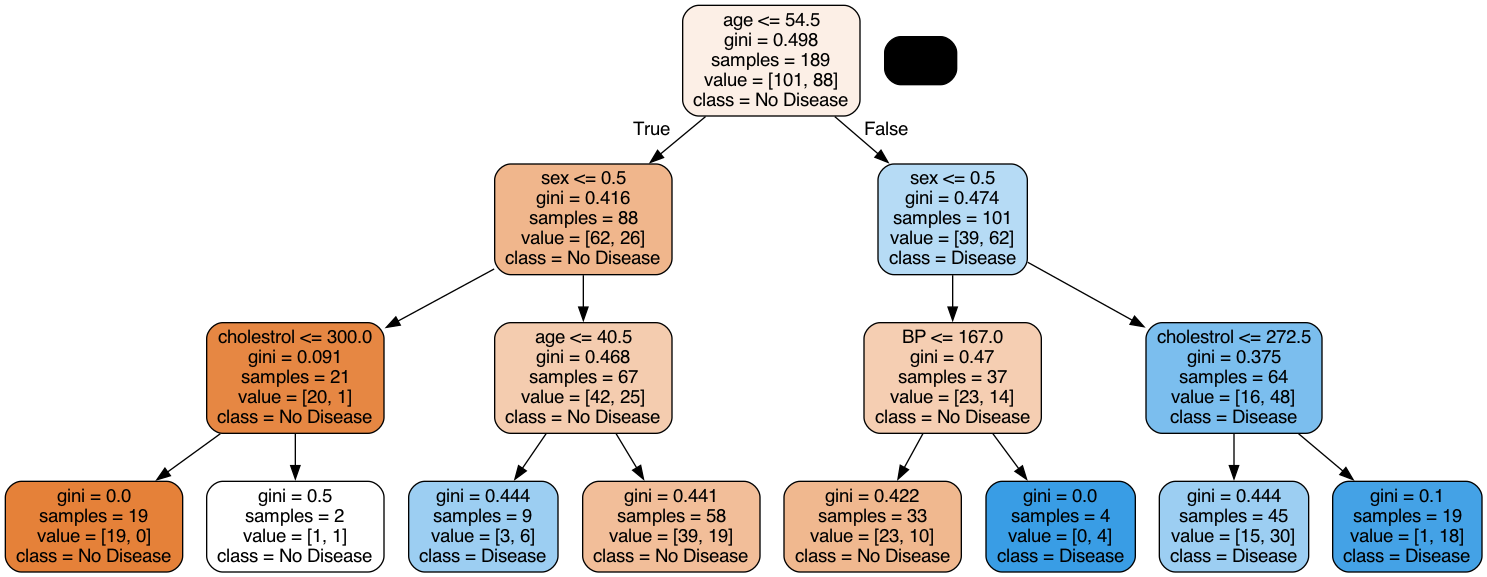

In [30]:
gph = get_dt_data(dt_depth)
Image(gph.create_png())

In [31]:
evaluate_model(dt_depth)

Train Set Performance
0.8518518518518519
[[91 10]
 [18 70]]
--------------------------------------------------
Test Set Performance
0.654320987654321
[[32 17]
 [11 21]]


### Specifying the minimum samples before split

In [32]:
dt_min_split = DecisionTreeClassifier(min_samples_split=20, random_state=42)
dt_min_split.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=20, random_state=42)

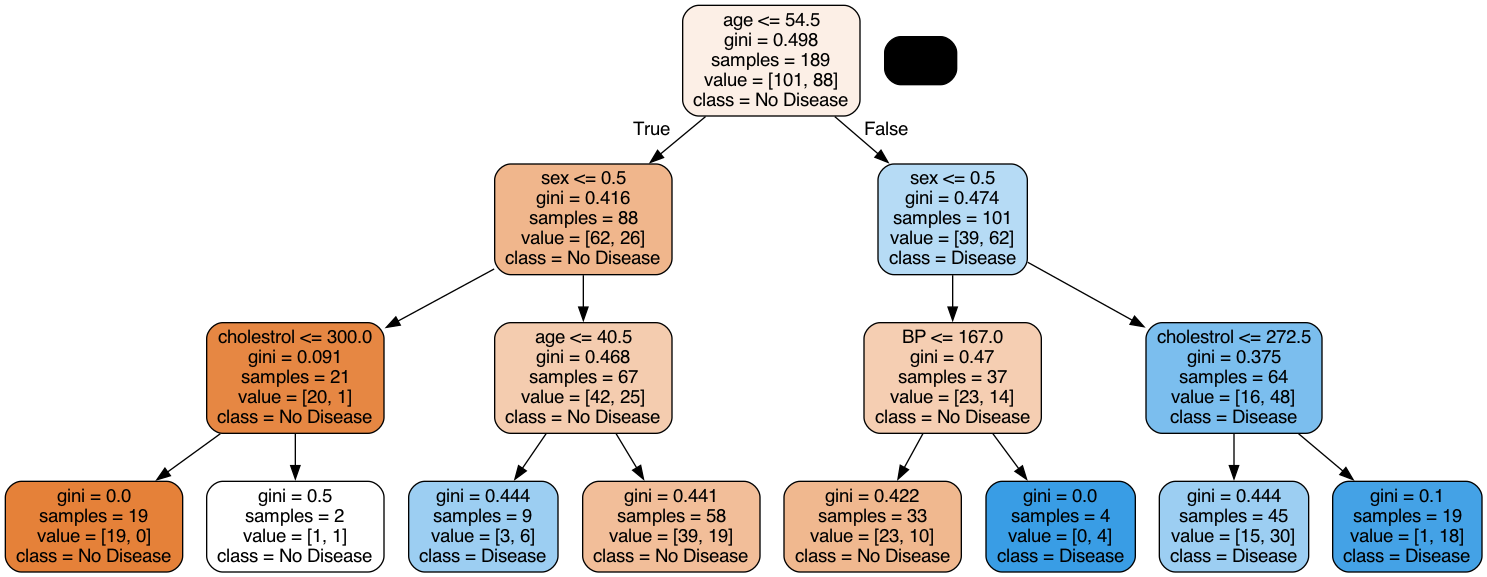

In [33]:
gph = get_dt_data(dt_min_split)
Image(gph.create_png())

In [34]:
evaluate_model(dt_min_split)

Train Set Performance
0.8359788359788359
[[85 16]
 [15 73]]
--------------------------------------------------
Test Set Performance
0.6419753086419753
[[32 17]
 [12 20]]


### Specifying minimum number of samples in leaf

In [35]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
dt_min_leaf.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

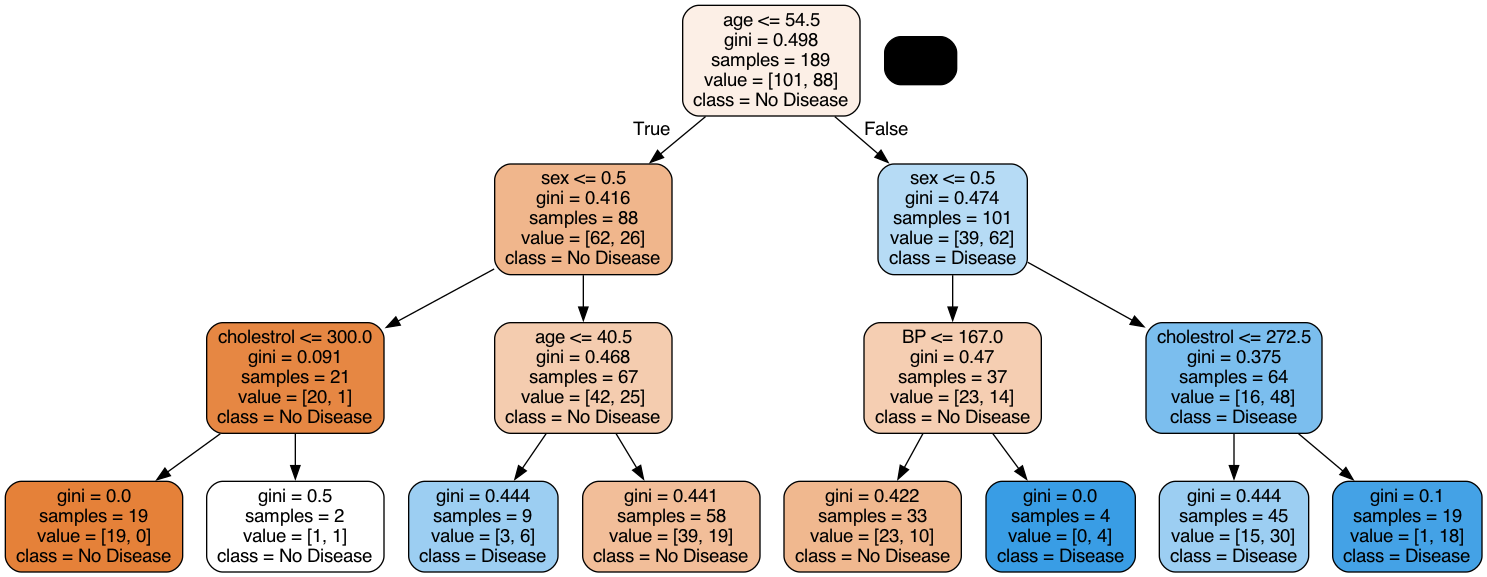

In [36]:
gph = get_dt_data(dt_min_split)
Image(gph.create_png())

In [37]:
evaluate_model(dt_min_leaf)


Train Set Performance
0.7037037037037037
[[85 16]
 [40 48]]
--------------------------------------------------
Test Set Performance
0.6419753086419753
[[38 11]
 [18 14]]


### Using Entropy instead of Gini

In [38]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion='entropy')
dt_min_leaf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

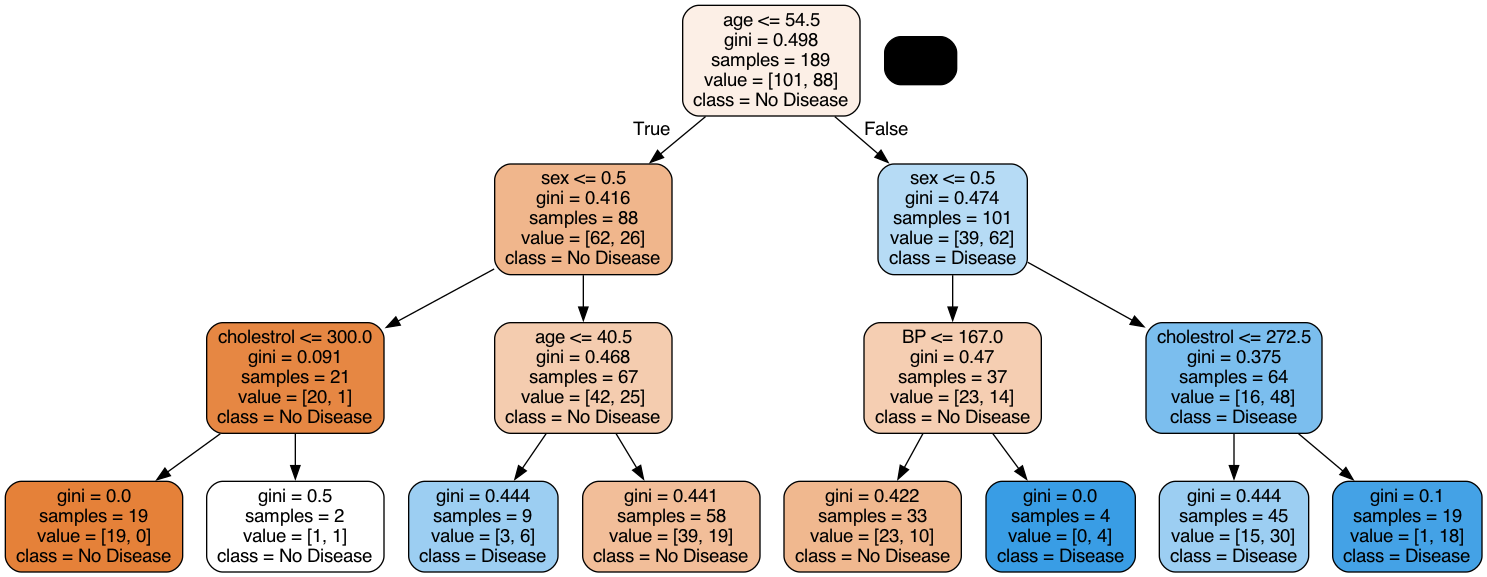

In [39]:
gph = get_dt_data(dt_min_leaf_entropy)
Image(gph.create_png())

In [40]:
evaluate_model(dt_min_leaf_entropy)

Train Set Performance
0.7037037037037037
[[85 16]
 [40 48]]
--------------------------------------------------
Test Set Performance
0.6419753086419753
[[38 11]
 [18 14]]


Entropy and Gini gives same result

You cannot always choose the best set of hyperparameters for the model manually. Instead, you can use gridsearchcv() in Python, which uses the cross-validation technique. 

The problems with manual hyperparameter tuning are as follows:

- Split into train and test sets: Tuning a hyperparameter makes the model 'see' the test data. Also, the results are dependent upon the specific train-test split.

- Split into train, validation and test sets: The validation data would eat into the training set.

### K-fold cross-validation

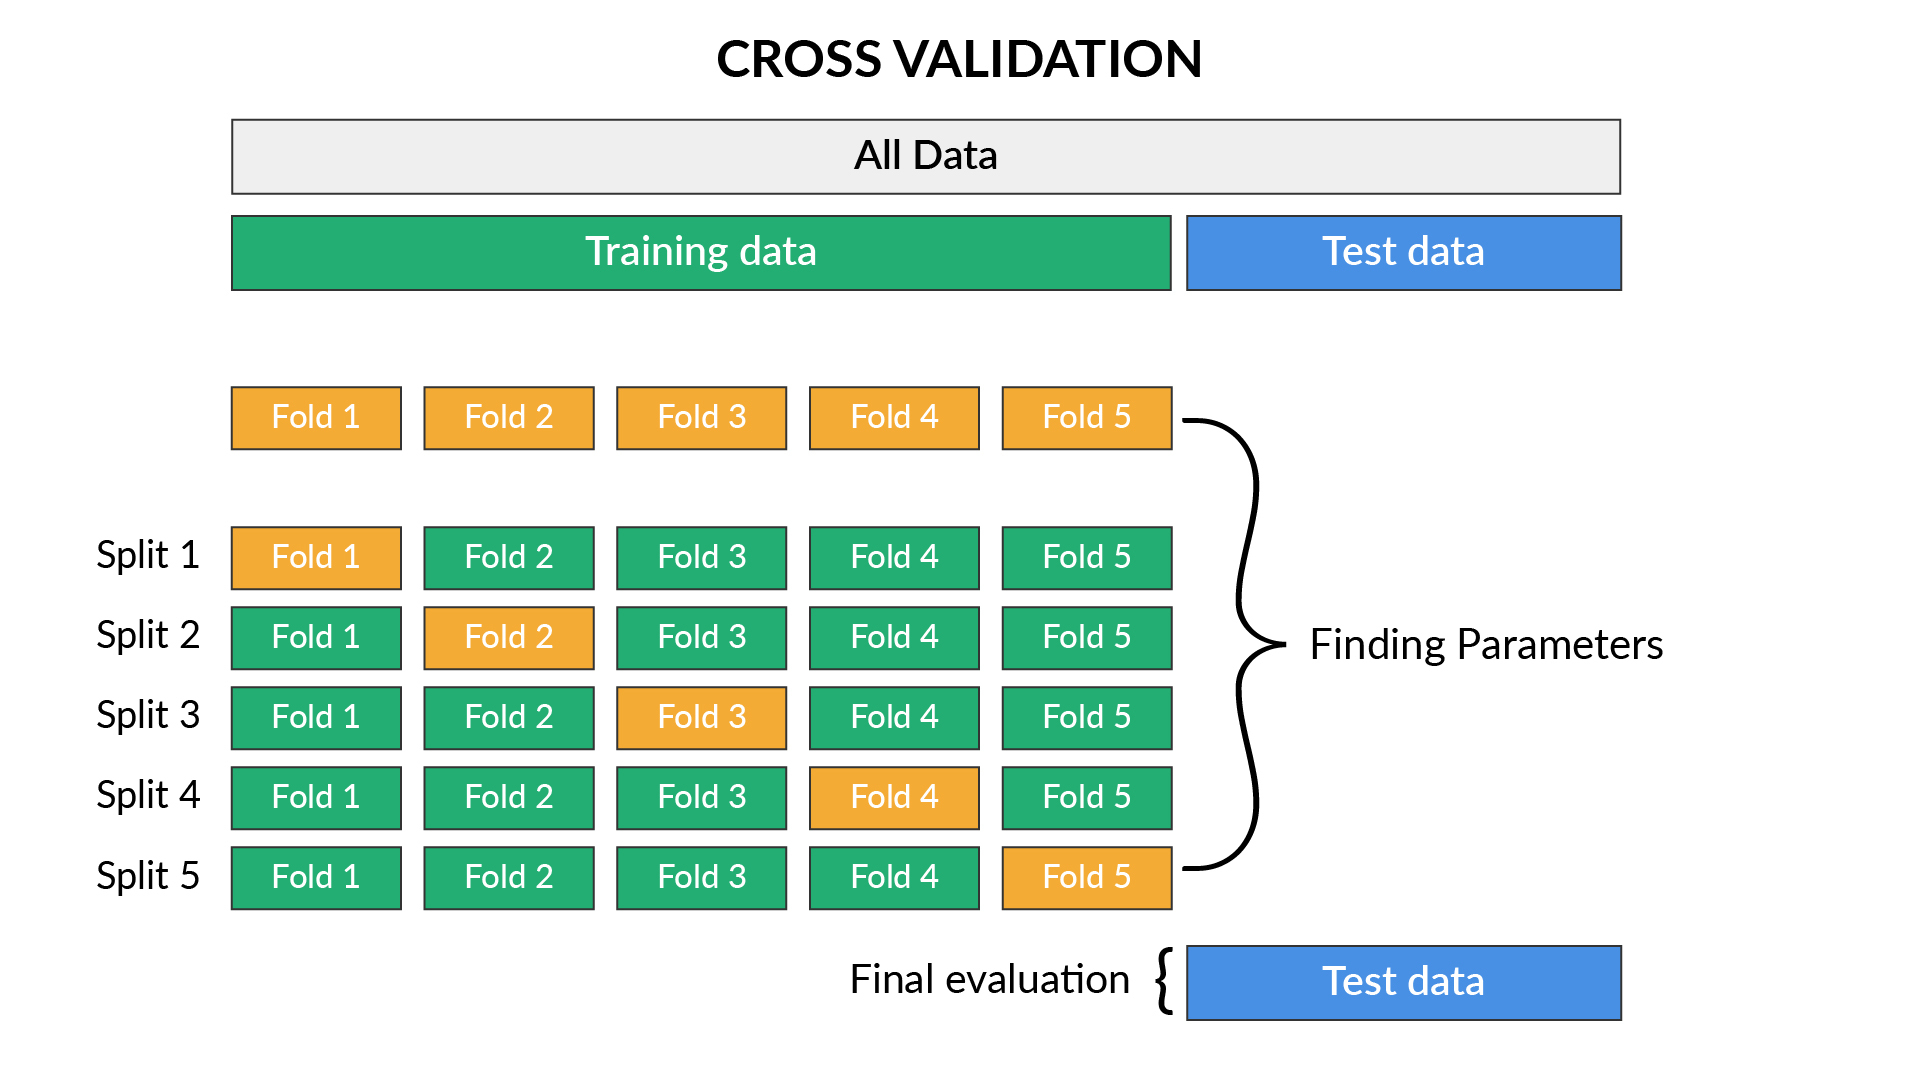

- In the cross-validation technique, you split the data into train and test sets and train multiple models by sampling the train set. Finally, you can use the test set to test the hyperparameter once.

 

- Specifically, you can apply the k-fold cross-validation technique, where you can divide the training data into k-folds/groups of samples. If k = 5, you can use k-1 folds to build the model and test it on the kth fold. 

 

- It is important to remember that k-fold cross-validation is only applied on the train data. The test data is used for the final evaluation. One extra step that we perform in order to execute cross-validation is that we divide the train data itself into train and test (or validation) data and keep changing it across "k" no. of folds so that the model is more generalised.


- The green and orange boxes constitute the training data. Here, the green ones are the actual training data and orange ones are the test (or validation) data points selected within the training dataset. As you can see, the training data is divided into 5 blocks or folds, and each time 4 blocks are being used as training data and the remaining one block is being used as the validation data. Once the training process is complete, you jump to model evaluation on the test data depicted by the blue box.


- Now, coming back to the question, how do you control the complexity (or size) of a tree? A very ‘big’ or complex tree will result in overfitting. On the other hand, if you build a relatively small tree, it may not be able to achieve a good enough accuracy, i.e., it will underfit. So, what values of hyperparameters should you choose? As you would have guessed, you can use grid search with cross-validation to find the optimal hyperparameters.

### Hyper parameters tuning using Grid search CV

In [41]:
dt = DecisionTreeClassifier(random_state=42)

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
# For GridSearch to work, we have to specify all the parameters which we want to try
params = {
          'max_depth': [2,3,5,10,20],
          'min_samples_leaf': [5,10,20,50,100],
          'criterion':['gini', 'entropy']
}

In [44]:
grid_search = GridSearchCV(estimator=dt,
            param_grid=params,
            cv=4,
            n_jobs=-1,
            verbose=1,
            scoring='accuracy') # cv specifies the cross-validation scheme being used.Data is divided into specified number of sets.1 set is for testing part and n-1 for training.
#n_jobs is for multiple cores to work in multiprocessing.
#verbose - will tell you what the situation /progress is.
# scoring strategy used here is Accuracy as the data is balanced.


In [45]:
%%time
grid_search.fit(X_train, y_train)
# max_depth -5 and min_samples_leaf -5 i.e total of 5*5=25 candidates. 75% train and 25% test data - this will be shuffled for 4 times
# Total - 50*4 runs

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: user 235 ms, sys: 111 ms, total: 345 ms
Wall time: 3.71 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [46]:
grid_search.cv_results_

{'mean_fit_time': array([0.0040527 , 0.00375175, 0.00396806, 0.00413269, 0.00411195,
        0.0027799 , 0.00265729, 0.00580376, 0.0031628 , 0.00281715,
        0.00403178, 0.00305074, 0.00489253, 0.00273764, 0.00298476,
        0.00427425, 0.00438005, 0.00319731, 0.00277507, 0.00249249,
        0.00460726, 0.00334626, 0.00373304, 0.00411254, 0.00280929,
        0.00595927, 0.0041579 , 0.00453812, 0.00385427, 0.0037055 ,
        0.00385958, 0.00541705, 0.00320619, 0.00300765, 0.00529945,
        0.00509971, 0.00291777, 0.00508147, 0.00329238, 0.00321877,
        0.00388378, 0.00536019, 0.00499117, 0.00862122, 0.00401562,
        0.0083127 , 0.00478107, 0.00670511, 0.00470698, 0.00321484]),
 'std_fit_time': array([6.38875968e-04, 1.97770116e-04, 1.51934784e-03, 1.13154179e-03,
        1.04953828e-03, 9.29247499e-05, 1.51205365e-04, 3.24065530e-03,
        2.14349201e-04, 1.96696556e-04, 1.80047269e-03, 1.49270250e-04,
        3.24902929e-03, 1.61550932e-04, 2.49750887e-04, 6.56368048e-0

In [47]:
cv_df =pd.DataFrame(grid_search.cv_results_)
cv_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.004053      0.000639         0.002128        0.000154   
1       0.003752      0.000198         0.002869        0.001569   
2       0.003968      0.001519         0.002731        0.000738   
3       0.004133      0.001132         0.005108        0.003103   
4       0.004112      0.001050         0.002006        0.000249   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               2                      5   
1            gini               2                     10   
2            gini               2                     20   
3            gini               2                     50   
4            gini               2                    100   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.708333   
1  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.708333   
2  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.687500   
3  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.666667   
4  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.541667   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.744681           0.617021           0.531915         0.650488   
1           0.744681           0.617021           0.531915         0.650488   
2           0.744681           0.617021           0.531915         0.645279   
3           0.680851           0.574468           0.702128         0.656028   
4           0.531915           0.531915           0.531915         0.534353   

   std_test_score  rank_test_score  
0        0.082762               17  
1        0.082762               17  
2        0.079551               20  
3        0.048751                3  
4        0.004223               41

In [48]:
cv_df.shape

(50, 15)

In [49]:
cv_df.nlargest(5, 'mean_test_score') # gives 5 results with best mean score

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
30       0.003860      0.000938         0.004580        0.002756   
5        0.002780      0.000093         0.001663        0.000059   
3        0.004133      0.001132         0.005108        0.003103   
8        0.003163      0.000214         0.007092        0.004665   
13       0.002738      0.000162         0.002790        0.001410   

   param_criterion param_max_depth param_min_samples_leaf  \
30         entropy               3                      5   
5             gini               3                      5   
3             gini               2                     50   
8             gini               3                     50   
13            gini               5                     50   

                                               params  split0_test_score  \
30  {'criterion': 'entropy', 'max_depth': 3, 'min_...           0.604167   
5   {'criterion': 'gini', 'max_depth': 3, 'min_sam...           0.625000   
3   {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.666667   
8   {'criterion': 'gini', 'max_depth': 3, 'min_sam...           0.666667   
13  {'criterion': 'gini', 'max_depth': 5, 'min_sam...           0.666667   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
30           0.765957           0.617021           0.680851         0.666999   
5            0.744681           0.595745           0.659574         0.656250   
3            0.680851           0.574468           0.702128         0.656028   
8            0.680851           0.574468           0.702128         0.656028   
13           0.680851           0.574468           0.702128         0.656028   

    std_test_score  rank_test_score  
30        0.064090                1  
5         0.055831                2  
3         0.048751                3  
8         0.048751                3  
13        0.048751                3

In [50]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=42)

In [51]:
grid_search.best_score_ # best score is the average score of k-folds

0.6669991134751774

In [52]:
dt_best = grid_search.best_estimator_

In [53]:
evaluate_model(dt_best)

Train Set Performance
0.7195767195767195
[[82 19]
 [34 54]]
--------------------------------------------------
Test Set Performance
0.6172839506172839
[[36 13]
 [18 14]]


##### Logistic Regression versus Decision Trees

The decision boundary for a Logistic Regression is LINEAR.For a scattered dataset,the maximum it can do is generate a best fit line like

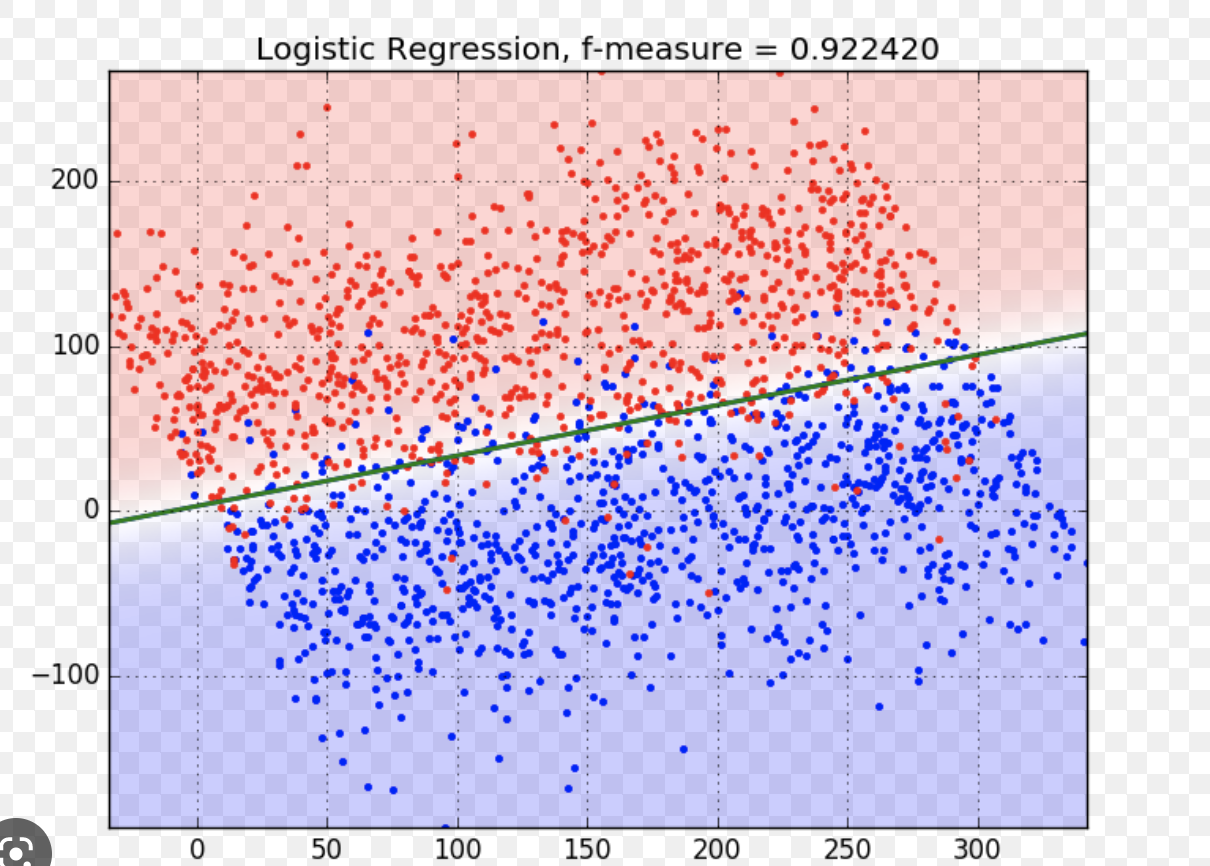

Boundary generated by DT is axis-parallel rectangles.
Decision Tree with max_depth as 'n' can often to OVERFITTING.As shown in the diagram,it generates compartments even gfor the outliers!

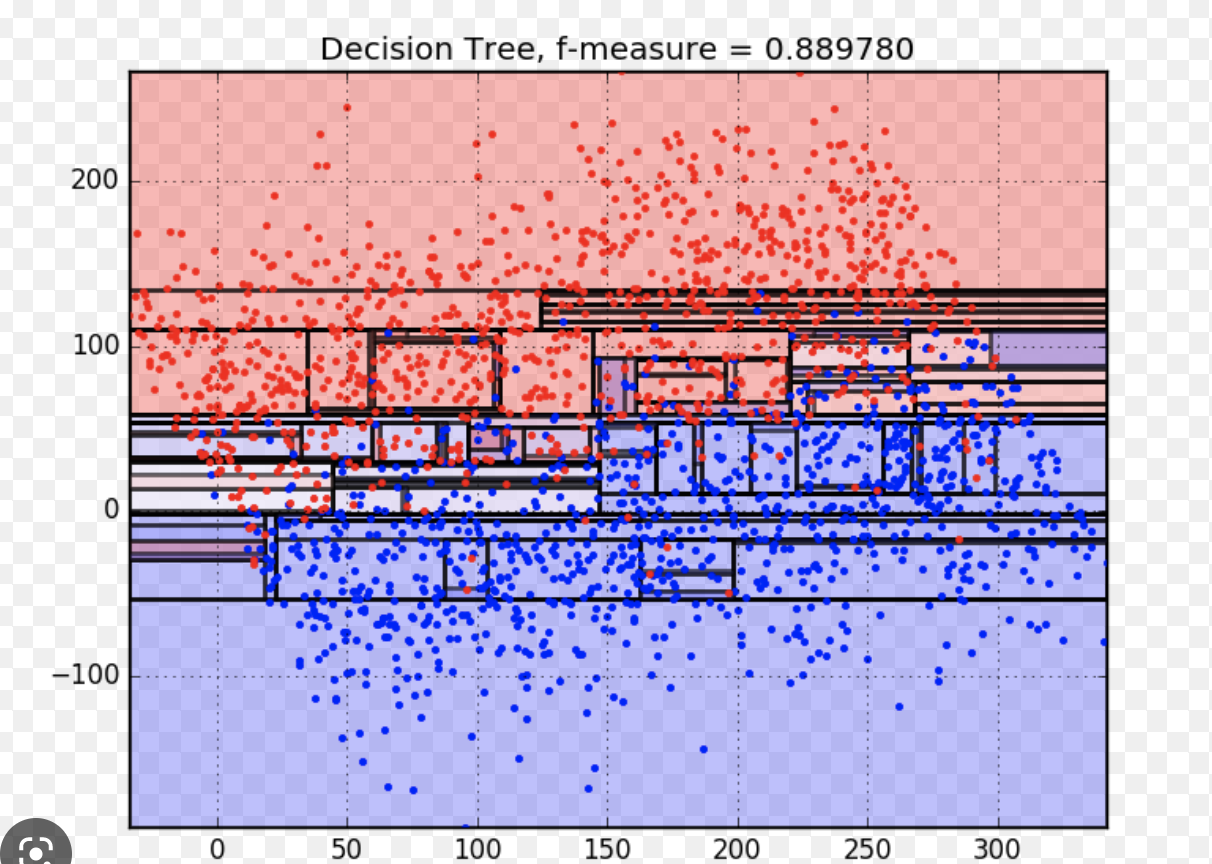

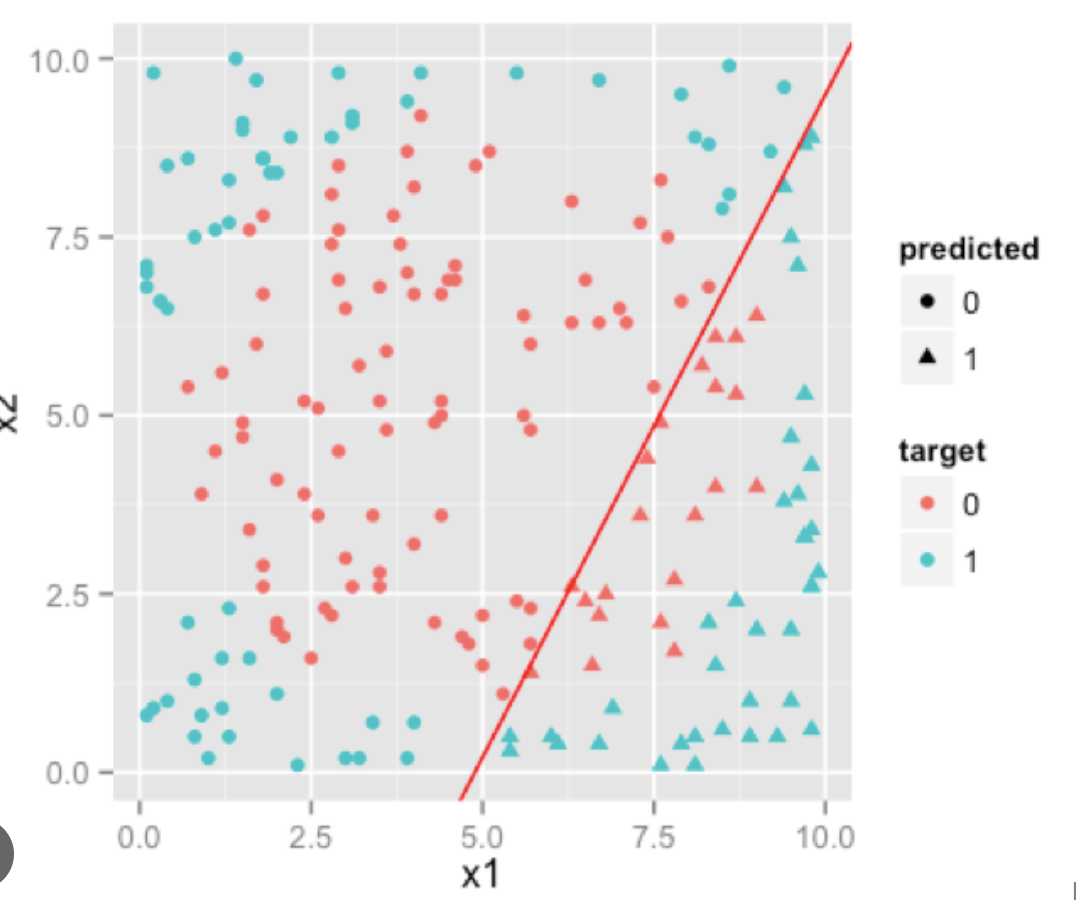

POWER OF DECISION TREE

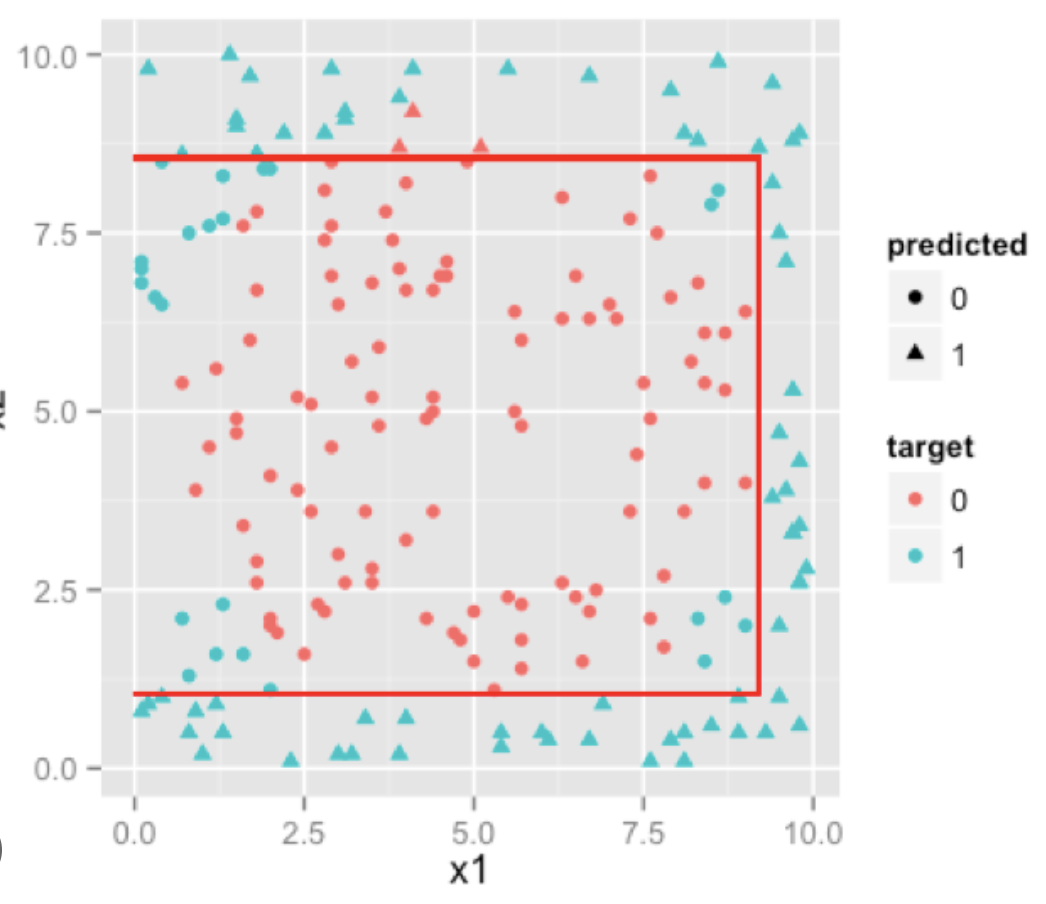

### Using Random forest classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
X_train.head()

age  sex   BP  cholestrol
84    57    1  110         201
251   44    1  130         219
92    54    1  124         266
201   58    1  125         300
126   62    1  120         267

In [56]:
y_train.head()

84     0
251    0
92     1
201    1
126    1
Name: heart disease, dtype: int64

In [57]:
rf = RandomForestClassifier(random_state=42, max_depth=3, n_estimators=10)

In [58]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [59]:
rf.estimators_[4]

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=996406378)

In [60]:
sample_tree = rf.estimators_[4]
# This will give a DT

In [61]:
gph = get_dt_data(sample_tree)
Image(gph.create_png())

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.